#三軍總醫院北投分院統計及實驗設計課程之一  
## 2021/6/24
## ytai1123@gmail.com
### 使用方法:


1.   使用gmail帳號登入
2.   按"執行階段" -->"全部執行" 以執行全部內容, 若要個別執行可點選每格程式左方箭頭或按 Control + Enter 鍵執行。




In [ ]:
!git clone https://github.com/YuehMintTai/RPython.git

Cloning into 'RPython'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 41 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (41/41), done.


In [ ]:
!pip install rpy2

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
myData <- read.csv('RPython/samples.csv')
head(myData)
myData[1,]

  SID 性別     年齡 入伍前職業 教育程度 婚姻狀況 皆無過去病史01 早產兒01
1 137    1 21.33308       學生        4        1              0        0
  頭部曾受傷01 發展遲緩01 注意力不足過動症01 癲癇01 癲癇服藥治療 癲癇服藥期間
1            1          0                  0      0            0            0
  軍種 軍階 役別 入伍至今_年 聽過自殺課程_次 求助心輔_次 求助精神科_次
1   11    1    2         0.3               0           1             1
  使用1995_次 使用24h專線_次 特殊狀況 父母婚姻狀態 自殺意念_bsrs6 B型肝炎01
1           0              0        4            1              0         0
  C型肝炎01 氣喘史01 過敏史01 心臟病史01 高血壓01 醣尿病01 甲狀腺01 類風濕01
1         0        0        1          0        0        0        0        0
  重大意外01 自殺意念01 透露父母 透露手足 透露好友 透露同儕 透露長官 透露心輔
1          1          0        0        0        1        0        0        0
  透露醫師 拒告父母 拒告手足 拒告好友 拒告同儕 拒告長官 拒告心輔 拒告醫師
1        0        1        0        0        0        1        0        0
  BSRS總分 BSRSR總分 過動症總分 Inattention Impulsivity opposition depression
1        1         1         23          21           2          9         13
 

In [ ]:
###檢視統計模型: 家庭滿意度apgar --> 網路成癮分數YDQ
%%R
formula='網路成癮分數YDQ~家庭滿意度apgar'
model1 <-glm(formula, myData, family='gaussian')
summary(model1)


Call:
glm(formula = formula, family = "gaussian", data = myData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5125  -1.8546  -0.8546   1.8138   6.1454  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.51255    0.45740   7.679 8.82e-13 ***
家庭滿意度apgar -0.16580    0.05836  -2.841    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.856059)

    Null deviance: 1136.5  on 187  degrees of freedom
Residual deviance: 1089.2  on 186  degrees of freedom
AIC: 869.8

Number of Fisher Scoring iterations: 2



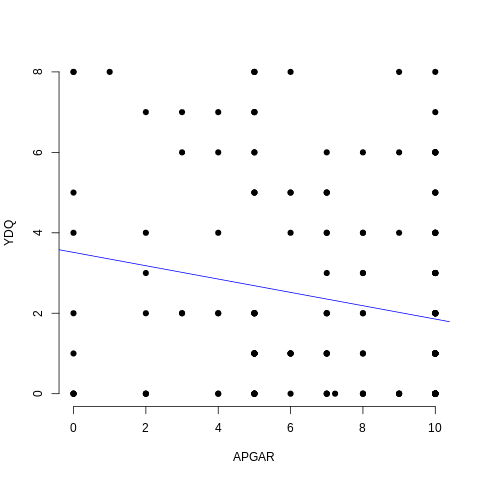

In [ ]:
##繪製Acatter plot和 linear regression line
%%R
plot(myData$家庭滿意度apgar, myData$網路成癮分數YDQ, xlab='APGAR', ylab='YDQ', pch=19, frame=FALSE)
abline(glm(網路成癮分數YDQ~家庭滿意度apgar, data=myData),col='blue')

In [ ]:
%%R
fit1 <- lm(BSRS總分 ~ 年齡 + 家庭滿意度apgar, data=myData)
summary(fit1)


Call:
lm(formula = BSRS總分 ~ 年齡 + 家庭滿意度apgar, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8611 -3.2879 -0.7738  3.0258 11.1353 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.8612     1.8070   2.690  0.00779 ** 
年齡              0.1993     0.0710   2.807  0.00554 ** 
家庭滿意度apgar  -0.4825     0.1021  -4.727  4.5e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.184 on 185 degrees of freedom
Multiple R-squared:  0.159,	Adjusted R-squared:  0.1499 
F-statistic: 17.48 on 2 and 185 DF,  p-value: 1.112e-07



In [ ]:
import pandas as pd
df=pd.read_csv('RPython/samples.csv')
df.head()

,SID,性別,年齡,入伍前職業,教育程度,婚姻狀況,皆無過去病史01,早產兒01,頭部曾受傷01,發展遲緩01,注意力不足過動症01,癲癇01,癲癇服藥治療,癲癇服藥期間,軍種,軍階,役別,入伍至今_年,聽過自殺課程_次,求助心輔_次,求助精神科_次,使用1995_次,使用24h專線_次,特殊狀況,父母婚姻狀態,自殺意念_bsrs6,B型肝炎01,C型肝炎01,氣喘史01,過敏史01,心臟病史01,高血壓01,醣尿病01,甲狀腺01,類風濕01,重大意外01,自殺意念01,透露父母,透露手足,透露好友,透露同儕,透露長官,透露心輔,透露醫師,拒告父母,拒告手足,拒告好友,拒告同儕,拒告長官,拒告心輔,拒告醫師,BSRS總分,BSRSR總分,過動症總分,Inattention,Impulsivity,opposition,depression,anxiety,burdensome,belonging,家庭滿意度apgar,網路成癮症01,網路成癮分數YDQ,existeness,meaning,control,seeking,death,suicidea,睡眠困擾_bsrs1,睡眠困擾_bsrsr1,睡眠困擾_bdi16,易怒_bsrs3,易怒_bsrsr3,depress,impuls,Internet,ADHD
0,137,1,21.333082,學生,4,1,0.0,0.0,1.0,0,0.0,0.0,0,0.0,11,1,2,0.3000,0.0,1.0,1.0,0.0,0.0,4.0,1.0,0,0.0,0,0.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1.0,1.0,23.0,21.0,2.0,9,13.0,53.0,23.0,19,10.0,0,2,18.0,18.0,11,18,15,0,0,0,0.0,0,0,13.0,2.0,2,23.0
1,78,2,15.000000,,4,1,1.0,0.0,0.0,0,0.0,0.0,0,0.0,8,2,4,3.0412,3.0,0.0,0.0,0.0,0.0,4.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0.0,0.0,3.0,2.0,1.0,4,0.0,21.0,6.0,70,10.0,0,3,9.0,17.0,12,14,15,2,0,0,0.0,0,0,0.0,1.0,3,3.0
2,102,1,24.000000,,3,1,1.0,0.0,0.0,0,0.0,0.0,0,0.0,8,2,4,1.5000,10.0,0.0,0.0,0.0,0.0,4.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0.0,0.0,17.0,13.0,4.0,6,0.0,21.0,6.0,42,10.0,1,6,10.0,10.0,10,10,15,1,0,0,0.0,0,0,0.0,4.0,6,17.0
3,82,1,15.000000,學生,4,1,1.0,0.0,0.0,0,0.0,0.0,0,0.0,8,2,4,1.5000,2.0,0.0,0.0,0.0,0.0,4.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1.0,1.0,3.0,2.0,1.0,0,1.0,23.0,18.0,30,10.0,0,2,15.0,16.0,14,15,12,0,0,0,0.0,0,0,1.0,1.0,2,3.0
4,160,1,16.000000,學生,4,1,1.0,0.0,0.0,0,0.0,0.0,0,0.0,8,2,4,3.0412,3.0,0.0,0.0,0.0,0.0,4.0,1.0,0,0.0,0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0.0,0.0,7.0,5.0,2.0,3,2.0,22.0,8.0,38,10.0,0,1,7.0,13.0,9,17,14,0,0,0,0.0,0,0,2.0,2.0,1,7.0


In [ ]:
%load_ext rpy2.ipython

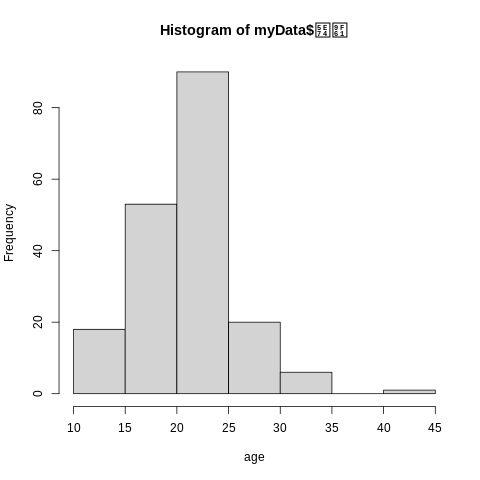

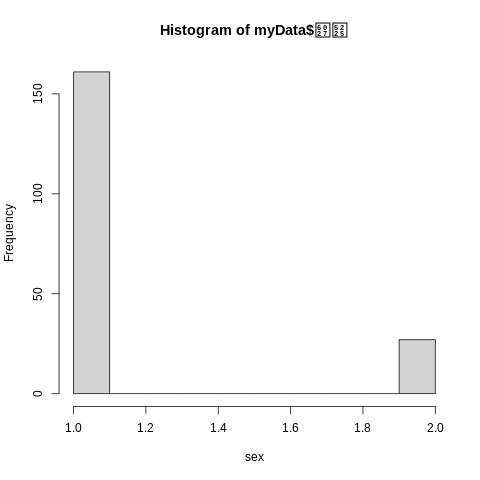

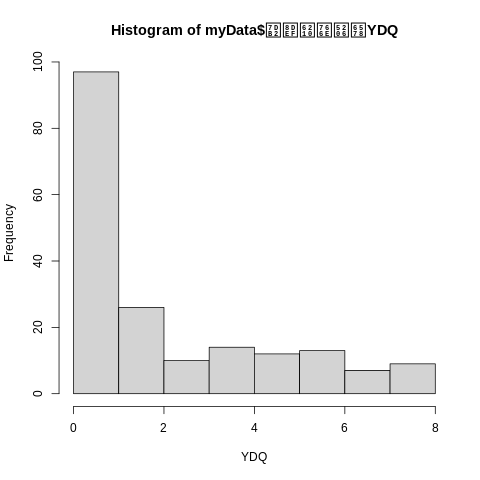

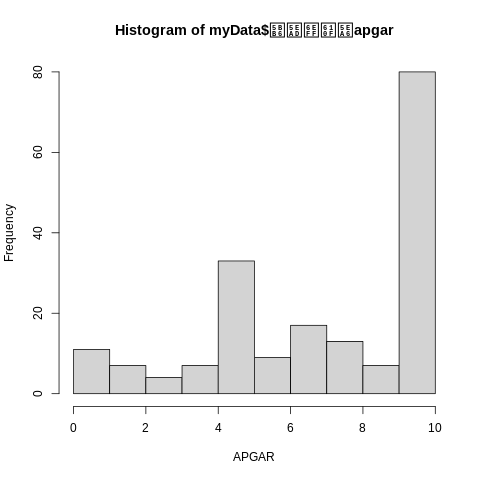

In [ ]:
%%R
myData <- read.csv('RPython/samples.csv')
hist(myData$年齡, xlab='age')
hist(myData$性別, xlab='sex')
hist(myData$網路成癮分數YDQ, xlab='YDQ')
hist(myData$家庭滿意度apgar, xlab='APGAR')

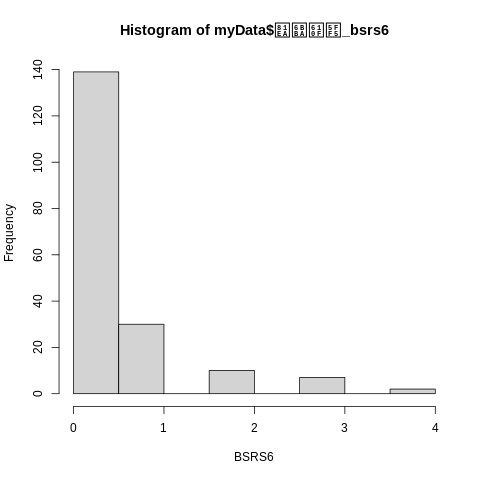

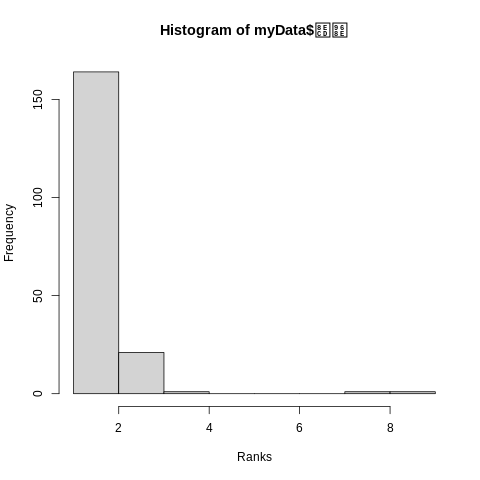

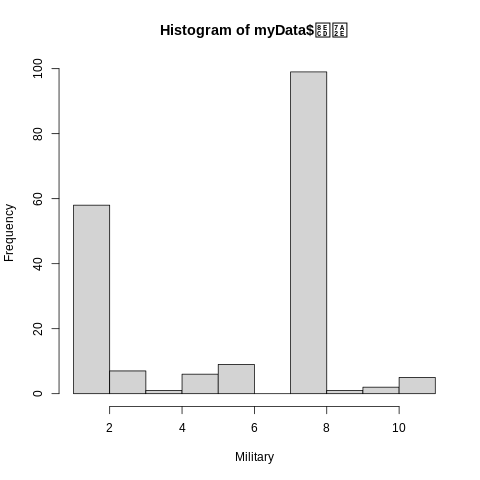

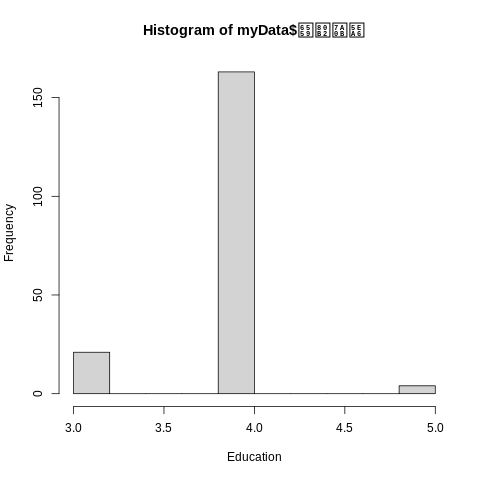

In [ ]:
%%R
myData <- read.csv('RPython/samples.csv')
hist(myData$自殺意念_bsrs6, xlab='BSRS6')
hist(myData$軍階, xlab='Ranks')
hist(myData$軍種, xlab='Military')
hist(myData$教育程度, xlab='Education')

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula='網路成癮分數YDQ~家庭滿意度apgar'
model=smf.glm(formula, df).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              網路成癮分數YDQ   No. Observations:                  188
Model:                            GLM   Df Residuals:                      186
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          5.8561
Method:                          IRLS   Log-Likelihood:                -431.90
Date:                Fri, 25 Jun 2021   Deviance:                       1089.2
Time:                        07:17:03   Pearson chi2:                 1.09e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5125      0.457      7.679      0.0

In [ ]:
import statsmodels.api as sm

glm1=sm.GLM(df.年齡,[df.家庭滿意度apgar, df.BSRS總分], fammmily=sm.families.Gamma())
result=glm1.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ValueError: ignored